# Téléchargement de la structure de bande de phonons du matériau

In [18]:
from pymatgen.ext.matproj import MPRester

with MPRester("Igrq5N9t2TZdFvec") as m:

    bandstructure = m.get_phonon_bandstructure_by_material_id("mp-961706")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin

Structure de bande de phonons :


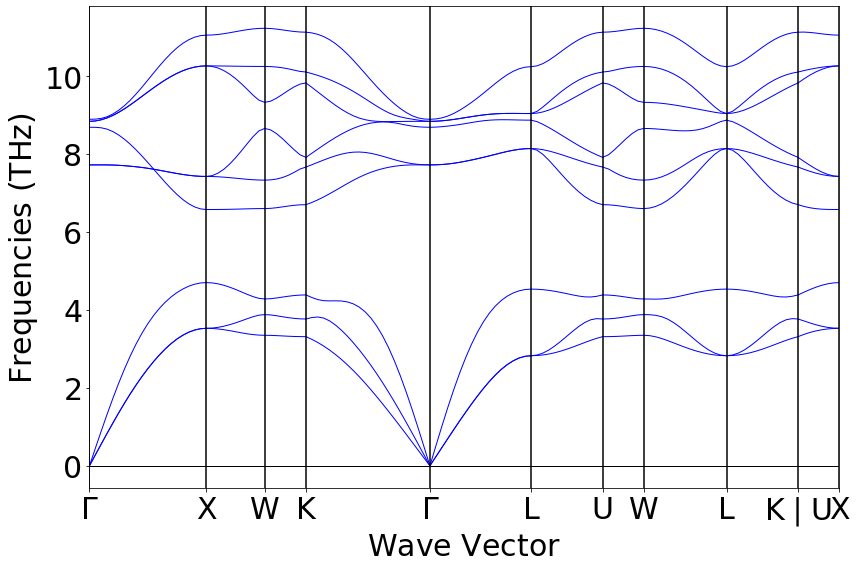

Zone de Brillouin :


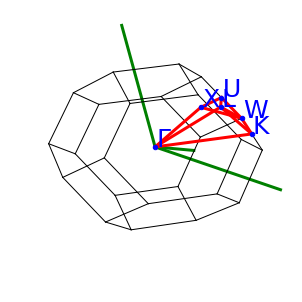

Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin :

La vitesse du son est donnée par v = dw/dq = 2*pi*df/dq.
La fréquence peut être représentée par une fonction linéaire du vecteur d'onde q pour des fréquences faibles : f(q) = a*q + b.
Donc calculer la vitesse du son revient à calculer la pente de l'approximation de f.

La vitesse du son de la 1ère branche acoustique dans la direction K - Γ vaut  1825.5424999016036  m/s et est représentée par la flèche bleue.
La vitesse du son de la 2ème branche acoustique dans la direction Γ - L vaut  1906.0471359187973  m/s et est représentée par la flèche verte.
La vitesse du son de la 3ème branche acoustique dans la direction L - U vaut  142.54285062750492  m/s et est représentée par la flèche orange.


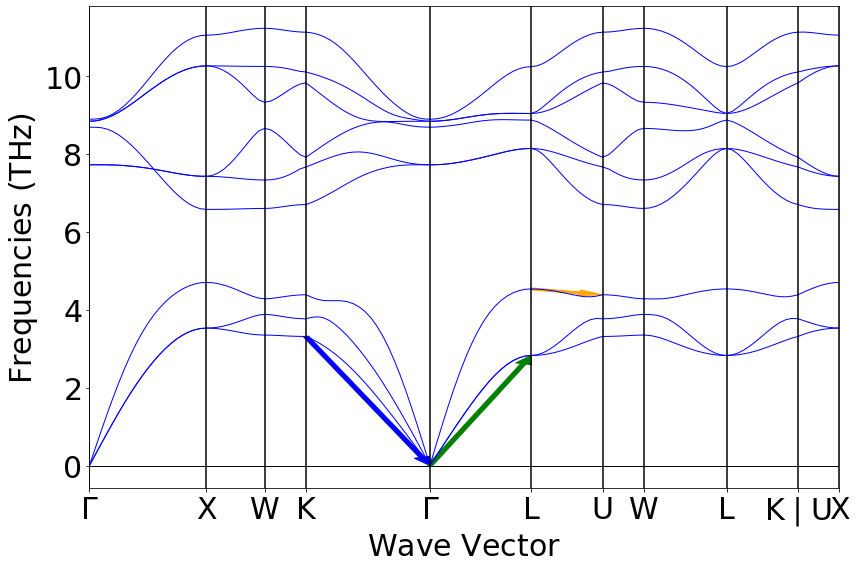

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from pymatgen.phonon.plotter import *


# Structure de bande de phonons
print("Structure de bande de phonons :")
bsplotter = PhononBSPlotter(bandstructure)
bsplotter.show()


# Zone de Brillouin
print("Zone de Brillouin :")
bsplotter.plot_brillouin()


# Vitesse du son
print("Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin :\n")
print("La vitesse du son est donnée par v = dw/dq = 2*pi*df/dq.")
print("La fréquence peut être représentée par une fonction linéaire du vecteur d'onde q pour des fréquences faibles : f(q) = a*q + b.")
print("Donc calculer la vitesse du son revient à calculer la pente de l'approximation de f.\n")

data = bsplotter.bs_plot_data()
distances = data.get("distances")
frequencies = data.get("frequency")

d1 = distances[3]
f1 = frequencies[3][0]
x1 = d1[-1] - d1[0]
y1 = f1[-1] - f1[0]
v1 = 2*np.pi * abs(y1)*10**12*10**(-10)/x1
print("La vitesse du son de la 1ère branche acoustique dans la direction \u004B - \u0393 vaut ", v1, " m/s et est représentée par la flèche bleue.")

d2 = distances[4]
f2 = frequencies[4][1]
x2 = d2[-1] - d2[0]
y2 = f2[-1] - f2[0]
v2 = 2*np.pi * abs(y2)*10**12*10**(-10)/x2
print("La vitesse du son de la 2ème branche acoustique dans la direction \u0393 - L vaut ", v2, " m/s et est représentée par la flèche verte.")

d3 = distances[5]
f3 = frequencies[5][2]
x3 = d3[-1] - d3[0]
y3 = f3[-1] - f3[0]
v3 = 2*np.pi * abs(y3)*10**12*10**(-10)/x3
print("La vitesse du son de la 3ème branche acoustique dans la direction L - U vaut ", v3, " m/s et est représentée par la flèche orange.")

bsplotter.get_plot()
plt.arrow(d1[0], f1[0], x1, y1, color = 'blue', width = 0.05, length_includes_head = True)
plt.arrow(d2[0], f2[0], x2, y2, color = 'green', width = 0.05, length_includes_head = True)
plt.arrow(d3[0], f3[0], x3, y3, color = 'orange', width = 0.05, length_includes_head = True)
plt.show()
